# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, the template provided by udacity for the Traffic sign recognition project has been filled out.

In [1]:
# import
import numpy as np

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

# data file location
training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

# load pickle data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# seperate features and labels
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples
n_test = len(X_test)

# Shape of an traffic sign image
image_shape = (X_train[0].shape)

# Number of unique classes/labels there are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

Max color value  255
Min color value  0
Label image  0 :  38
Label image  1 :  13
Label image  2 :  1


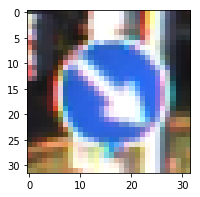

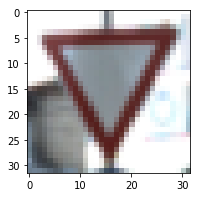

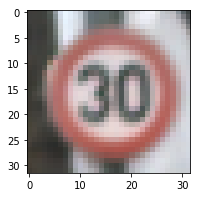

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline


# Information for normalization
# max feature value
print("Max color value ", np.max(X_train))
# min feature value
print("Min color value ", np.min(X_train))

# view 3 example signs
for i in range(3):
    index = random.randint(0,len(X_train))
    image = X_train[index]

    plt.figure(figsize=(3,3))
    plt.imshow(image, cmap="gray")
    print("Label image ", i , ": ", y_train[index])


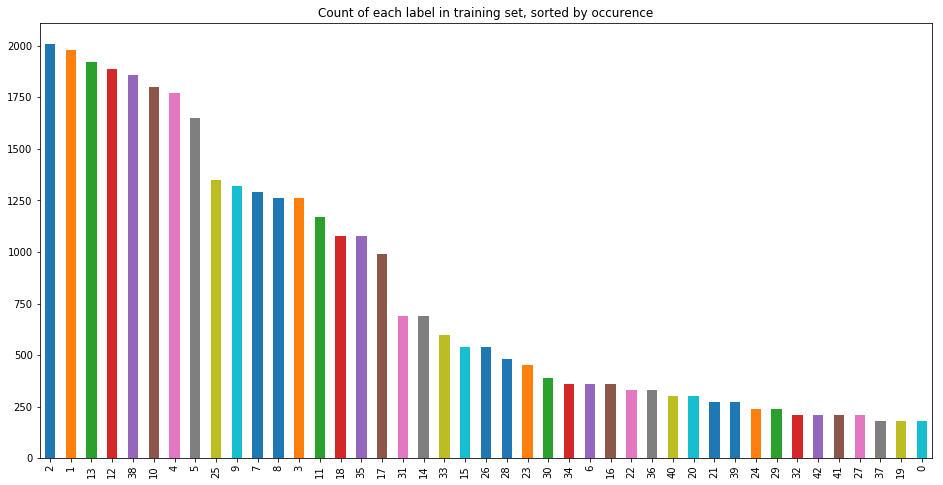

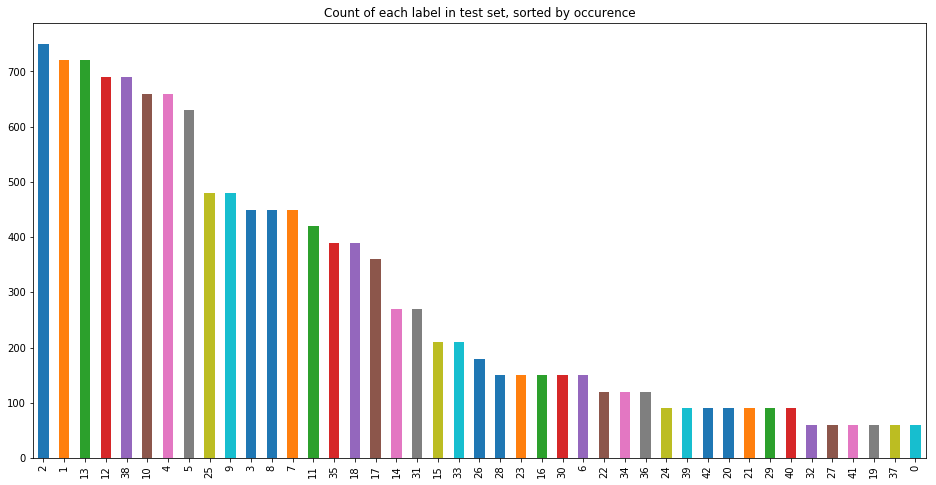

In [5]:
plt.figure(figsize=(16,8))
pd.Index(y_train).value_counts().plot(kind='bar', title="Count of each label in training set, sorted by occurence")
plt.savefig('./training_set_vis.jpg')

plt.figure(figsize=(16,8))
pd.Index(y_test).value_counts().plot(kind='bar', title="Count of each label in test set, sorted by occurence")
plt.savefig('./test_set_vis.jpg')



# frequency of signs seem to be more or less evenly distributed among these two sets

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# normalization of images
def normalization(image_batch):
    return (image_batch-128)/128

# Preprocessing of images, normalization and greyscale
def preprocessing(image_batch):
    # greyscale
    image_batch = np.expand_dims(np.mean(image_batch, axis=3),axis=3)
    return normalization(image_batch)


X_train = preprocessing(X_train)
X_valid = preprocessing(X_valid)
X_test = preprocessing(X_test)

# update image shape
image_shape = X_train[0].shape





### Model Architecture

In [7]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten


### Define your architecture here.

# convolutional layer with relu activation function
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    return tf.nn.relu(x + b)

# Max pooling layer with default kernel size of 2
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

# fully connected layer with relu activation
def fully_connected_relu(x, W, b):
    x = fully_connected(x, W, b)
    x = tf.nn.relu(x)
    return x

# fully connected layer
def fully_connected(x, W, b):
    return tf.matmul(x, W) + b

# LeNet architecture
def LeNet(x, output_size):    
    mu = 0
    sigma = 0.1
    
    # Input = 32x32x3. Output = 28x28x10.
    conv1 = conv2d(x, tf.Variable(tf.truncated_normal([5,5,x.shape.as_list()[-1],10], mean = mu, stddev = sigma)), tf.Variable(tf.zeros([10])))
    # Input = 28x28x10. Output = 14x14x10.
    max_pool1 = maxpool2d(conv1)
    # Input = 14x14x10. Output = 10x10x16.
    conv2 = conv2d(max_pool1, tf.Variable(tf.truncated_normal([5,5,10,16], mean = mu, stddev = sigma)), tf.Variable(tf.zeros([16])))
    # Input = 10x10x16. Output = 6x6x64.
    conv3 = conv2d(conv2, tf.Variable(tf.truncated_normal([5,5,16,64], mean = mu, stddev = sigma)), tf.Variable(tf.zeros([64])))
    # Input = 6x6x64. Output = 3x3x64.
    max_pool2 = maxpool2d(conv3)
    # Flatten. Input = 3x3x64. Output = 576.
    flat = flatten(max_pool2)
    # Input = 576. Output = 120.
    full_con1 = fully_connected_relu(flat, tf.Variable(tf.truncated_normal([576,120], mean = mu, stddev = sigma)), tf.Variable(tf.zeros([120])) )
    drop1 = tf.nn.dropout(full_con1,keeprate)
    # Input = 120. Output = 84.
    full_con2 = fully_connected_relu(drop1, tf.Variable(tf.truncated_normal([120,84], mean = mu, stddev = sigma)), tf.Variable(tf.zeros([84])) )
    drop2 = tf.nn.dropout(full_con2,keeprate)
    # Input = 84. Output = 43.
    logits = fully_connected(drop2, tf.Variable(tf.truncated_normal([84,output_size], mean = mu, stddev = sigma)), tf.Variable(tf.zeros([output_size])) )
    return logits

In [8]:

EPOCHS = 15
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]))
y = tf.placeholder(tf.int32, (None))
keeprate = tf.placeholder(tf.float32)
keeprate_train = 0.7
keeprate_valid = 1.0
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.0025

# create LeNet model
logits = LeNet(x, n_classes)
# calc cross entropy 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
# mean of cross entropy as loss function
loss_operation = tf.reduce_mean(cross_entropy)
# adam optimizer with learning rate defined above
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# minimize the loss
training_operation = optimizer.minimize(loss_operation)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


# calc prediction
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# calc softmax
softmax_pred = tf.nn.softmax(logits)
# calc accuracy
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# evaluate data set
def evaluate(X_data, y_data):
    # size of dataset
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    # evaluate in mini-batches
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keeprate: keeprate_valid})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



In [10]:
from sklearn.utils import shuffle

saver = tf.train.Saver()

# train model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keeprate: keeprate_train})
        training_acc = evaluate(X_train, y_train)
        print("Training Accuracy = {:.3f}".format(training_acc))
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_traffic_signs')
    print("Model saved")

Training...

Training Accuracy = 0.937
EPOCH 1 ...
Validation Accuracy = 0.900

Training Accuracy = 0.971
EPOCH 2 ...
Validation Accuracy = 0.930

Training Accuracy = 0.987
EPOCH 3 ...
Validation Accuracy = 0.956

Training Accuracy = 0.987
EPOCH 4 ...
Validation Accuracy = 0.951

Training Accuracy = 0.991
EPOCH 5 ...
Validation Accuracy = 0.955

Training Accuracy = 0.995
EPOCH 6 ...
Validation Accuracy = 0.965

Training Accuracy = 0.995
EPOCH 7 ...
Validation Accuracy = 0.969

Training Accuracy = 0.994
EPOCH 8 ...
Validation Accuracy = 0.964

Training Accuracy = 0.996
EPOCH 9 ...
Validation Accuracy = 0.966

Training Accuracy = 0.996
EPOCH 10 ...
Validation Accuracy = 0.969

Training Accuracy = 0.998
EPOCH 11 ...
Validation Accuracy = 0.971

Training Accuracy = 0.998
EPOCH 12 ...
Validation Accuracy = 0.965

Training Accuracy = 0.997
EPOCH 13 ...
Validation Accuracy = 0.973

Training Accuracy = 0.997
EPOCH 14 ...
Validation Accuracy = 0.962

Training Accuracy = 0.998
EPOCH 15 ...
Valid

In [11]:
saver = tf.train.Saver()


# test model
with tf.Session() as sess:
    saver.restore(sess, './lenet_traffic_signs')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./lenet_traffic_signs
Test Accuracy = 0.953


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

`signnames.csv`contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

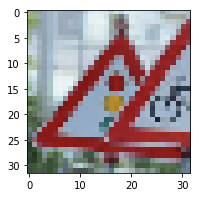

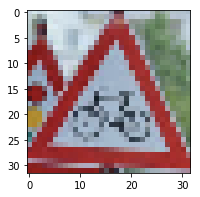

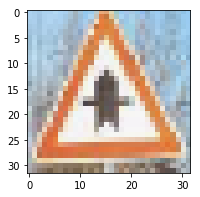

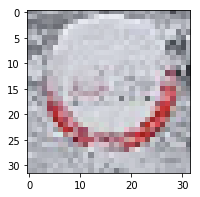

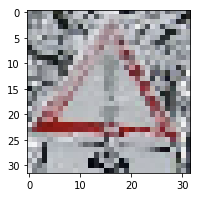

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
from PIL import Image
from numpy import asarray


X_test_new = []
files = glob.glob('traffic_signs_web/*.png')
files.sort()

y_test_new = [26, 29, 11, 9,18]
for filename in files: #path of raw images
    img = Image.open(filename).resize((32,32))
    X_test_new.append(asarray(img))
    plt.figure(figsize=(3,3))
    plt.imshow(img, cmap="gray")

    
    

### Predict the Sign Type for Each Image and analyze Performance

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_test_new_pre = preprocessing(X_test_new)
print(X_test_new_pre.shape)


(5, 32, 32, 1)


In [14]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
# calc prediction
prediction = tf.argmax(logits, 1)

with tf.Session() as sess:
    saver.restore(sess, './lenet_traffic_signs')
    pred = sess.run(prediction, feed_dict={x: X_test_new_pre, y: y_test_new, keeprate: keeprate_valid})
    top_5 = sess.run(tf.nn.top_k(softmax_pred, k=5, sorted=True), feed_dict={x: X_test_new_pre, y: y_test_new, keeprate: keeprate_valid})
    test_new_accuracy = evaluate(X_test_new_pre, y_test_new)
    print("Test Accuracy on own images = {:.3f}".format(test_new_accuracy))
    print("Label array =      ", y_test_new)
    print("Prediction array = ", pred)



INFO:tensorflow:Restoring parameters from ./lenet_traffic_signs
Test Accuracy on own images = 0.400
Label array =       [26, 29, 11, 9, 18]
Prediction array =  [ 4 28 11 12 18]


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

for i in range(len(X_test_new)):    
    print("image ",i+1,": ")
    print("Label ", y_test_new[i])
    print("Softmax probabilities: ", top_5[0][i])
    print("Classification index: ", top_5[1][i])
    




image  1 : 
Label  26
Softmax probabilities:  [  9.82068598e-01   1.43803805e-02   3.08792223e-03   3.40829225e-04
   5.01229006e-05]
Classification index:  [ 4 33 18  5  1]
image  2 : 
Label  29
Softmax probabilities:  [ 0.93166965  0.0329752   0.01584075  0.01123512  0.00571061]
Classification index:  [28 35 29  9  3]
image  3 : 
Label  11
Softmax probabilities:  [  1.00000000e+00   4.02408453e-08   1.09306386e-09   3.25290628e-10
   3.59580594e-11]
Classification index:  [11 30 21 27 18]
image  4 : 
Label  9
Softmax probabilities:  [ 0.6566475   0.15907826  0.06669778  0.03917014  0.01327311]
Classification index:  [12 11  2 40 30]
image  5 : 
Label  18
Softmax probabilities:  [  9.90043402e-01   8.00809357e-03   8.70159885e-04   7.21848977e-04
   2.55006395e-04]
Classification index:  [18  1 12 14 38]
